# Task 2: R2U-Net on Cityscapes dataset

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="6"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from CityscapesLoader import CityscapesLoader
import jsonpickle
from LossCalculator import LossCalculator

In [3]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (12.0, 8.0)

In [4]:
# specify device depending on availability of GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Log loading

In [5]:
experimentPath = "../experiments/train_ids/task2_basic_training/"
timestamp = "2021-03-08T12-53-10"
#experimentPath = "../experiments/train_ids/task2_deep_architecture/"
#timestamp = "2021-03-16T14-28-31"
model = torch.load(experimentPath + timestamp + "-model.pt")
with open(experimentPath + timestamp + "-log.json", "r") as file:
    logger = jsonpickle.decode(file.read())
exp_conf = logger.experiment_configuration

In [6]:
torch.manual_seed(logger.random_seed)

## Data loading

In [7]:
loader = CityscapesLoader()
trainSet, valSet, testSet = loader.load() 

## Validation loss

## Visual inspection

In [8]:
sample = 427

In [9]:
dummyInput = testSet[sample][0].unsqueeze(0)
dummyInput.shape

torch.Size([1, 3, 256, 512])

In [10]:
dummyOutput = model(dummyInput.to(device))
dummyOutput.shape

torch.Size([1, 19, 256, 512])

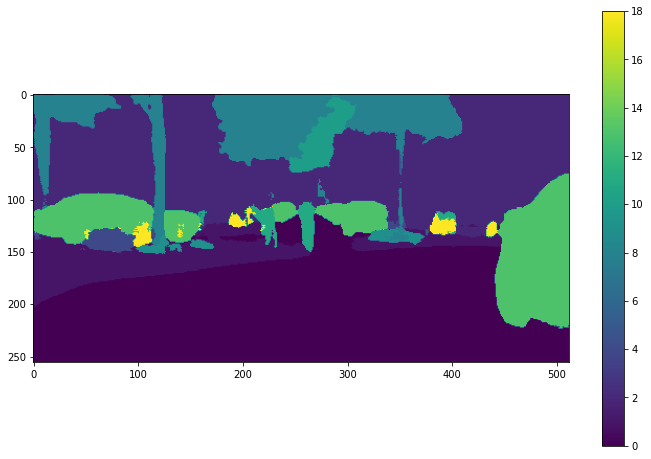

In [11]:
plt.imshow(torch.argmax(dummyOutput.detach().cpu().squeeze(), dim=0).numpy())
plt.colorbar()
plt.show()

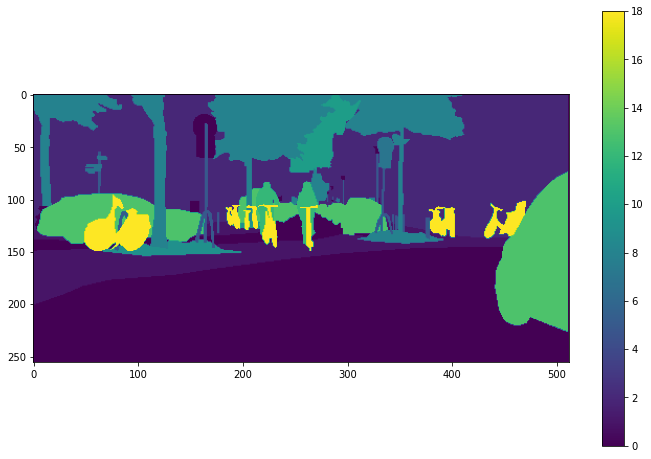

In [12]:
trueOutput = testSet[sample][1].squeeze().numpy()
trueOutput[trueOutput == 255] = 0
plt.imshow(trueOutput)
plt.colorbar()
plt.show()